In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('marketing_data.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,05/11/2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,04/08/2014,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [4]:
# Dari Data berikut, objek EDA kita adalah untuk mengetahui :
# 1. Profile Customer 
# 2. Hubungan nya dengan produk yang dijual
# 3. Dari mana mereka membeli Produk
# 4. Campaign paling efektif 
# Data bisa digunakan mengoptimalkan campaign promosi, produk yang ditawarkan, serta target market perusahaan selanjutnya

In [5]:
# Customer Profile dari suatu Supermarket
# 1. Year of Birth, Education, Marital Status, Income, Children
# 2. Date Customer : kapan Customer mulai berbelanja dan mendaftar dirinya
# 3. Recency : berapa hari sejak customer terakhir berbelanja
# 4. Mnt Wines, Fruits, Meat Products, Fish Products, Sweet Products, Gold Products : berapa total spending per kategory
# 5. NumWebPurchases, NumStorePurchase, NumCatalogPurchase :jumlah pembelian menggunakan web, store, catalogue
# 6. NumDealPurchase : jumlah pembelian dengan diskon
# 7. NumWebVisitsMonth : jumlah kunjungan ke website di bulan terakhir
# 8. AcceptedCmp : 1/0 Customer yg menerima penawaran dari campaign
# 9. COmplain : jumlah Complain
# 10. Country : dari negara mana

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp6            0
Complain                0
Country                 0
dtype: int64

In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp6            0
Complain                0
Country                 0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

# Data Awal 2240, Income Null itu 24, setelah di drop jadi 2216

In [11]:
df.drop_duplicates()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,05/11/2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,04/08/2014,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,03/07/2013,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/03/2012,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


# Data tidak ada yg duplikat, karena setelah di drop jumlah baris masih tetap 2216

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [14]:
df['ID'] = df['ID'].astype('object')
df['Year_Birth'] = df['Year_Birth'].astype('object')
df['Kidhome'] = df['Kidhome'].astype('object')
df['Teenhome'] = df['Teenhome'].astype('object')
df['Recency'] = df['Recency'].astype('object')
df['AcceptedCmp3'] = df['AcceptedCmp3'].astype('object')
df['AcceptedCmp4'] = df['AcceptedCmp4'].astype('object')
df['AcceptedCmp5'] = df['AcceptedCmp5'].astype('object')
df['AcceptedCmp1'] = df['AcceptedCmp1'].astype('object')
df['AcceptedCmp2'] = df['AcceptedCmp2'].astype('object')
df['AcceptedCmp6'] = df['AcceptedCmp6'].astype('object')
df['Complain'] = df['Complain'].astype('object')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   object 
 1   Year_Birth           2216 non-null   object 
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   object 
 6   Teenhome             2216 non-null   object 
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   object 
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

# Mengubah tipe data Kategorikal menjadi Object

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
MntWines,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0
MntSweetProducts,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.00,262.0
MntGoldProds,2216.0,43.965253,51.815414,0.0,9.0,24.5,56.00,321.0
NumDealsPurchases,2216.0,2.323556,1.923716,0.0,1.0,2.0,3.00,15.0
NumWebPurchases,2216.0,4.085289,2.740951,0.0,2.0,4.0,6.00,27.0
NumCatalogPurchases,2216.0,2.671029,2.926734,0.0,0.0,2.0,4.00,28.0


In [17]:
Q1 = df.describe()['Income']['25%']
Q3 = df.describe()['Income']['75%']
IQR = Q3 - Q1
UpperFence = Q3 + (1.5*IQR)
LowerFence = Q1 - (1.5*IQR)
df[(df['Income'] < LowerFence) | (df['Income'] > UpperFence)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Complain,Country
325,4931,1977,Graduation,Together,157146.0,0,0,4/29/13,13,1,...,0,1,0,0,0,0,0,0,0,SA
497,1501,1982,PhD,Married,160803.0,0,0,08/04/2012,21,55,...,1,0,0,0,0,0,0,0,0,US
527,9432,1977,Graduation,Together,666666.0,1,0,06/02/2013,23,9,...,3,6,0,0,0,0,0,0,0,SA
731,1503,1976,PhD,Together,162397.0,1,1,06/03/2013,31,85,...,1,1,0,0,0,0,0,0,0,SP
853,5336,1971,Master,Together,157733.0,1,0,06/04/2013,37,39,...,1,1,0,0,0,0,0,0,0,SP
1826,5555,1975,Graduation,Divorced,153924.0,0,0,02/07/2014,81,1,...,0,0,0,0,0,0,0,0,0,SP
1925,11181,1949,PhD,Married,156924.0,0,0,8/29/13,85,2,...,0,0,0,0,0,0,0,0,0,CA
2204,8475,1973,PhD,Married,157243.0,0,1,03/01/2014,98,20,...,0,0,0,0,0,0,0,0,0,IND


# Outliers Income hanya ada 8, sehingga tidak terlalu berpengaruh terhadap Data

In [18]:
df['Dt_Customer']=df['Dt_Customer'].astype('datetime64')

In [19]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d/%m/%Y')

In [20]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [21]:
date = df['Dt_Customer'].dt

In [22]:
df['Month'] = date.month
df['Month_Name'] = date.month_name()
df['Year'] = date.year

In [23]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Complain,Country,Month,Month_Name,Year
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,6,June,2014
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,6,June,2014
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,5,May,2014
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,5,May,2014
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,SP,4,April,2014


In [24]:
df['Age'] = 2021 - df['Year_Birth']

In [25]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Complain,Country,Month,Month_Name,Year,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,6,June,2014,51
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,6,June,2014,60
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,5,May,2014,63
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,AUS,5,May,2014,54
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,1,0,SP,4,April,2014,32


In [26]:
df['Age'] = df['Age'].astype('int64')

In [27]:
df.describe()['Age']

count    2216.000000
mean       52.179603
std        11.985554
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: Age, dtype: float64

In [28]:
def AgeGrouping(x):
    if (x >= 25) & (x <= 35):
        return '(25-35)'
    elif (x >= 36) & (x <= 45):
        return '(36-45)'
    elif (x >= 46) & (x <= 55):
        return '(46-55)'
    elif (x > 55):
        return '(>55)'

In [29]:
df['Age_Grouping'] = df['Age'].apply(AgeGrouping)

In [30]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Complain,Country,Month,Month_Name,Year,Age,Age_Grouping
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,1,0,SP,6,June,2014,51,(46-55)
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,1,1,0,CA,6,June,2014,60,(>55)
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,US,5,May,2014,63,(>55)
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,AUS,5,May,2014,54,(46-55)
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,1,0,SP,4,April,2014,32,(25-35)


In [31]:
pd.crosstab(index=df['Age_Grouping'],columns='Customer Age',margins=True)

col_0,Customer Age,All
Age_Grouping,,
(25-35),187,187
(36-45),502,502
(46-55),678,678
(>55),849,849
All,2216,2216


In [32]:
(pd.crosstab(index=df['Age_Grouping'],columns='Customer Age',margins=True,normalize=True)*100).round(2)

col_0,Customer Age,All
Age_Grouping,,
(25-35),8.44,8.44
(36-45),22.65,22.65
(46-55),30.60,30.60
(>55),38.31,38.31
All,100.00,100.00


# Profil Usia Customer kebanyakan di atas 55

In [63]:
pd.crosstab(index=df['Education'],columns='Graduation Status',margins=True)

col_0,Graduation Status,All
Education,,
2n Cycle,200,200
Basic,54,54
Graduation,1116,1116
Master,365,365
PhD,481,481
All,2216,2216


In [62]:
(pd.crosstab(index=df['Education'],columns='Graduation Status',margins=True,normalize=True)*100).round(2)

col_0,Graduation Status,All
Education,,
2n Cycle,9.03,9.03
Basic,2.44,2.44
Graduation,50.36,50.36
Master,16.47,16.47
PhD,21.71,21.71
All,100.00,100.00


# Profil Status Pendidikan 50% nya Graduation S1

In [64]:
pd.crosstab(index=df['Marital_Status'],columns='Marital Status',margins=True)

col_0,Marital Status,All
Marital_Status,,
Absurd,2,2
Alone,3,3
Divorced,232,232
Married,857,857
Single,471,471
Together,573,573
Widow,76,76
YOLO,2,2
All,2216,2216


In [65]:
(pd.crosstab(index=df['Marital_Status'],columns='Marital Status',margins=True,normalize=True)*100).round(2)

col_0,Marital Status,All
Marital_Status,,
Absurd,0.09,0.09
Alone,0.14,0.14
Divorced,10.47,10.47
Married,38.67,38.67
Single,21.25,21.25
Together,25.86,25.86
Widow,3.43,3.43
YOLO,0.09,0.09
All,100.00,100.00


In [37]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Complain,Country,Month,Month_Name,Year,Age,Age_Grouping
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,1,0,SP,6,June,2014,51,(46-55)
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,1,1,0,CA,6,June,2014,60,(>55)
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,US,5,May,2014,63,(>55)
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,AUS,5,May,2014,54,(46-55)
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,1,0,SP,4,April,2014,32,(25-35)


In [66]:
pd.crosstab(index=df['Kidhome'],columns='Number of Kids',margins=True)

col_0,Number of Kids,All
Kidhome,,
0,1283,1283
1,887,887
2,46,46
All,2216,2216


In [67]:
pd.crosstab(index=df['Teenhome'],columns='Number of Teens',margins=True)

col_0,Number of Teens,All
Teenhome,,
0,1147,1147
1,1018,1018
2,51,51
All,2216,2216


# Kebanyakan Customer tidak memiliki Kids ataupun Teens, tetapi untuk yang mempunyai 1 anak juga lumayan banyak

In [40]:
df.describe()['Income']

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [41]:
def IncomeGrouping(x):
    if (x>=1500) & (x<=25000):
        return '(1500-25000)'
    elif (x>25000) & (x<=50000):
        return '(25001-50000)'
    elif (x>50000) & (x<=75000):
        return '(50001-75000)'
    elif (x>75000) & (x<=100000):
        return '(75001-100000)'
    else :
        return '(>100000)'

In [42]:
df['Income_Grouping'] = df['Income'].apply(IncomeGrouping)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,AcceptedCmp6,Complain,Country,Month,Month_Name,Year,Age,Age_Grouping,Income_Grouping
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,1,0,SP,6,June,2014,51,(46-55),(75001-100000)
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,1,1,0,CA,6,June,2014,60,(>55),(50001-75000)
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,US,5,May,2014,63,(>55),(50001-75000)
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,AUS,5,May,2014,54,(46-55),(25001-50000)
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,1,0,SP,4,April,2014,32,(25-35),(1500-25000)


In [43]:
pd.crosstab(index=df['Income_Grouping'],columns='Income Customer',margins=True)

col_0,Income Customer,All
Income_Grouping,,
(1500-25000),242,242
(25001-50000),818,818
(50001-75000),797,797
(75001-100000),346,346
(>100000),13,13
All,2216,2216


In [44]:
(pd.crosstab(index=df['Income_Grouping'],columns='Income Customer',margins=True,normalize=True)*100).round(2)

col_0,Income Customer,All
Income_Grouping,,
(1500-25000),10.92,10.92
(25001-50000),36.91,36.91
(50001-75000),35.97,35.97
(75001-100000),15.61,15.61
(>100000),0.59,0.59
All,100.00,100.00


# kebanyakan Customer memliki Income diantara 25000 - 75000 

In [45]:
df['Year'] = df['Year'].astype('object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   object        
 1   Year_Birth           2216 non-null   object        
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   object        
 6   Teenhome             2216 non-null   object        
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   object        
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [47]:
a = pd.crosstab(index = [df['Year'],df['Month']],columns='Jumlah Pendaftaran Customer',margins=True)
a

col_0       Jumlah Pendaftaran Customer   All
Year Month                                   
2012 7                                2     2
     8                              117   117
     9                               97    97
     10                              95    95
     11                              96    96
     12                              83    83
2013 1                              107   107
     2                               99    99
     3                              101   101
     4                               87    87
     5                              102   102
     6                               89    89
     7                               98    98
     8                              102   102
     9                               94    94
     10                             115   115
     11                              87    87
     12                              92    92
2014 1                               88    88
     2                               78    78
     3                              108   108
     4                               94    94
     5                              111   111
     6                               74    74
All                                2216  2216

In [48]:
b = pd.crosstab(index = df['Year'],columns='Jumlah Pendaftaran Customer',margins=True)
b

col_0,Jumlah Pendaftaran Customer,All
Year,,
2012,490,490
2013,1173,1173
2014,553,553
All,2216,2216


# Data dari sejak Juli 2012 hingga Juni 2014, tahun 2013 paling banyak mendaftarkan dirinya, untuk 2012 dan 2014 hanya 6 bulan, tetapi terdapat peningkatan

In [49]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,AcceptedCmp6,Complain,Country,Month,Month_Name,Year,Age,Age_Grouping,Income_Grouping
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,1,0,SP,6,June,2014,51,(46-55),(75001-100000)
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,1,1,0,CA,6,June,2014,60,(>55),(50001-75000)
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,US,5,May,2014,63,(>55),(50001-75000)
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,AUS,5,May,2014,54,(46-55),(25001-50000)
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,1,0,SP,4,April,2014,32,(25-35),(1500-25000)


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   object        
 1   Year_Birth           2216 non-null   object        
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   object        
 6   Teenhome             2216 non-null   object        
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   object        
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [51]:
c = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Year']].groupby('Year',as_index=0).agg('sum')
c

,Year,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,2012,191763,14630,95723,21890,15737,26090
1,2013,352735,30806,194855,42852,31322,53787
2,2014,131585,12969,79485,18663,12837,17550


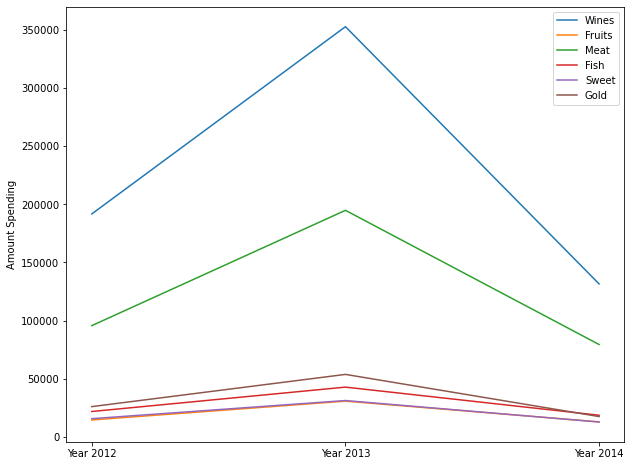

In [52]:
plt.figure(figsize=(10,8))
plt.plot(c['Year'],c['MntWines'])
plt.plot(c['Year'],c['MntFruits'])
plt.plot(c['Year'],c['MntMeatProducts'])
plt.plot(c['Year'],c['MntFishProducts'])
plt.plot(c['Year'],c['MntSweetProducts'])
plt.plot(c['Year'],c['MntGoldProds'])
plt.xticks([2012,2013,2014],['Year 2012','Year 2013','Year 2014'])
plt.ylabel('Amount Spending')
plt.legend(['Wines','Fruits','Meat','Fish','Sweet','Gold'],loc=0)
plt.show()

# SPending terbanyak ada di wines, kedua meat products

In [53]:
df[['MntWines','MntMeatProducts','Age_Grouping']].groupby('Age_Grouping').agg('sum')

,MntWines,MntMeatProducts
Age_Grouping,,
(25-35),50848,41221
(36-45),115220,74126
(46-55),192794,99468
(>55),317221,155248


# Spending Wine dan Meat Products kebanyakan ada di usia diatas 55 thn

In [54]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,AcceptedCmp6,Complain,Country,Month,Month_Name,Year,Age,Age_Grouping,Income_Grouping
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,1,0,SP,6,June,2014,51,(46-55),(75001-100000)
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,1,1,0,CA,6,June,2014,60,(>55),(50001-75000)
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,US,5,May,2014,63,(>55),(50001-75000)
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,AUS,5,May,2014,54,(46-55),(25001-50000)
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,1,0,SP,4,April,2014,32,(25-35),(1500-25000)


In [55]:
df[['MntWines','MntMeatProducts','Kidhome','Teenhome']].groupby(['Kidhome','Teenhome']).agg('sum')

MntWines  MntMeatProducts
Kidhome Teenhome                           
0       0           308950           234758
        1           258984            86357
        2            12287             4004
1       0            40949            24463
        1            45805            16785
        2             5796             2312
2       0             1041              715
        1             2271              669

# Spending Wine dan Meat Products kebanyakan tidak pny anak kecil dan tidak pny remaja, atau ada 1 anak remaja

In [56]:
df[['MntWines','MntMeatProducts','Marital_Status']].groupby('Marital_Status').agg('sum')

,MntWines,MntMeatProducts
Marital_Status,,
Absurd,711,625
Alone,554,79
Divorced,75364,34848
Married,256976,137888
Single,137217,87064
Together,176715,95374
Widow,27902,14085
YOLO,644,100


# Spending Wine dan Meat Products kebanyakan ada Marital Status Married dan Together

In [57]:
df[['MntWines','MntMeatProducts','Income_Grouping']].groupby('Income_Grouping').agg('sum')

,MntWines,MntMeatProducts
Income_Grouping,,
(1500-25000),2688,5251
(25001-50000),69017,30936
(50001-75000),367635,163732
(75001-100000),233863,164378
(>100000),2880,5766


# Spending Wine dan Meat Products kebanyakan pada income diatas 50000USD

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   object        
 1   Year_Birth           2216 non-null   object        
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   object        
 6   Teenhome             2216 non-null   object        
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   object        
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [69]:
df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','Age_Grouping']].groupby('Age_Grouping').agg('sum')

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Age_Grouping,,,
(25-35),617,509,1044
(36-45),1837,1107,2638
(46-55),2755,1582,3771
(>55),3844,2721,5402


# Untuk Setiap Kategori Umur, tetap Store Purchase lebih banyak dari Web

In [60]:
df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].groupby('NumWebVisitsMonth').agg('sum')

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
NumWebVisitsMonth,,,
0,34,83,52
1,524,909,1201
2,852,1046,1616
3,915,907,1530
4,973,616,1463
5,1208,640,1693
6,1435,733,1800
7,1419,477,1657
8,1325,430,1528


# Semakin sering Web Visit, maka web purchase makin banyak, tetapi hanya berlaku hingga 7 kali web visit last month, lebih dari itu kebanyakan hanya lihat2 saja

In [61]:
df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp6','Age_Grouping']].groupby('Age_Grouping').agg('sum')

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6
Age_Grouping,,,,,,
(25-35),19,3,18,8,25,32
(36-45),29,3,48,25,32,77
(46-55),30,11,52,53,41,106
(>55),64,13,45,78,64,118


# campaign 6 paling sukses dan campaign marketing ternyata tetap berpengaruh untuk target market diatas umur 55 thn

# Kesimpulan disarankan untuk memfokuskan target market ke umur diatas 46 thn serta dengan kepemilikan anak 0 atau maksimal 1 anak remaja, dengan produk yang dikembangkan terus adalah product Wines dan Meat. Web purchase tidak terlalu berkembang sehingga perlu lebih diperhatikan Offline Store nya daripada Website. Campaign 6 adalah campaign paling sukses (data tidak diketahui campaign seperti apa yang dilaksanakan)